In [1]:
# Make relevant plots of:
#  - Policies (as histogram)
#  - Policies (as bar chart)
#  - Diff in dose vs observed mortality for diff policies

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [450]:
action_df = pd.read_csv("/Users/tding/cs234/rlsepsis234/data3/action_df.csv")
df_orig = pd.read_csv("/Users/tding/cs234/rlsepsis234/data3/test_state_action_reward_df_no_scale.csv")
df_results = pd.read_csv("/Users/tding/cs234/rlsepsis234/results/final_dqn_offpol/20190317T171114_2k_steps/pred_real_compare20190317T171145")


In [451]:
action_map = {}
c = 0
for i in range(5):
    for j in range(5):
        action_map[c] = [i,j]
        c += 1

In [452]:
#df_results.count()

In [453]:
#df_orig.count()

In [454]:
#df_orig[["subject_id", "hadm_id","icustay_id", "interval_start_time", "interval_end_time", "sofa"]]

In [455]:
data=df_results.join(df_orig[["subject_id", "hadm_id","icustay_id", "interval_start_time", "interval_end_time", "sofa"]], how="left", lsuffix="_left")

In [456]:
def decode (df):
    df['vaso'] = action_map[df.discrete_action][1]
    df['iv']= action_map[int(df.discrete_action)][0]
    return df

In [457]:
data.columns

Index(['Unnamed: 0', 'subject_id_left', 'hadm_id_left', 'icustay_id_left',
       'interval_start_time_left', 'interval_end_time_left', 'sofa_left',
       'iv_pred', 'iv_real', 'vaso_pred', 'vaso_real', 'died', 'subject_id',
       'hadm_id', 'icustay_id', 'interval_start_time', 'interval_end_time',
       'sofa'],
      dtype='object')

(array([11044.,     0.,     0.,     0.,     0.,     0.,  6598.,     0.,
            0.,     0.,     0.,     0.,  6552.,     0.,     0.,     0.,
            0.,     0.,  7943.,     0.,     0.,     0.,     0.,     0.,
         7095.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  ]),
 <a list of 25 Patch objects>)

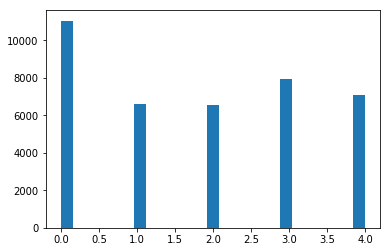

In [458]:
plt.hist(data.iv_pred, bins=25)

(array([9507.,    0.,    0.,    0.,    0.,    0., 7241.,    0.,    0.,
           0.,    0.,    0., 7427.,    0.,    0.,    0.,    0.,    0.,
        7550.,    0.,    0.,    0.,    0.,    0., 7507.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  ]),
 <a list of 25 Patch objects>)

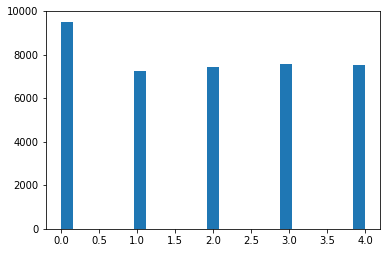

In [459]:
plt.hist(data.iv_real, bins=25)

(array([  502., 11901., 11905.,  7339.,  3880.,  1991.,  1008.,   422.,
          199.,    85.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

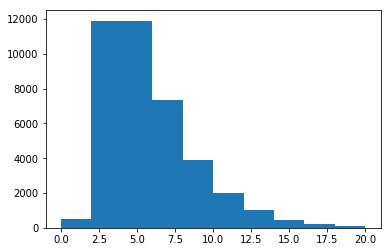

In [460]:
plt.hist(data.sofa)

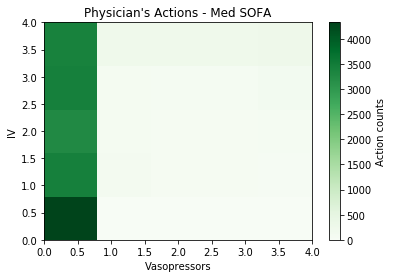

In [461]:
plt.hist2d(med_sofa.vaso_real, med_sofa.iv_real, bins=5, cmap='Greens')
plt.title("Physician's Actions - Med SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

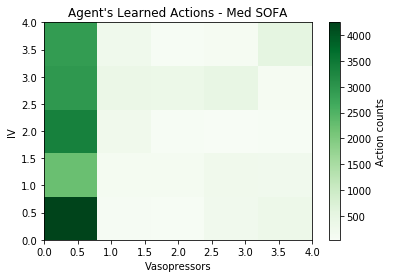

In [462]:
plt.hist2d(med_sofa.vaso_pred, med_sofa.iv_pred, bins=5, cmap='Greens')
plt.title("Agent's Learned Actions - Med SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

In [463]:
low_sofa = data[data['sofa'].between(0, 4, inclusive=True)]

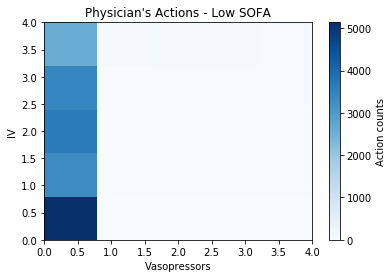

In [464]:
plt.hist2d(low_sofa.vaso_real, low_sofa.iv_real, bins=5, cmap='Blues')
plt.title("Physician's Actions - Low SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

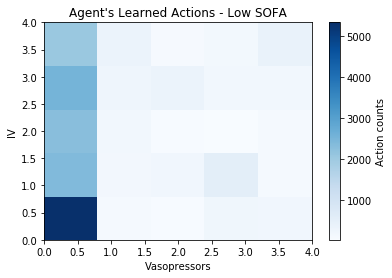

In [465]:
plt.hist2d(low_sofa.vaso_pred, low_sofa.iv_pred, bins=5, cmap='Blues')
plt.title("Agent's Learned Actions - Low SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

In [466]:
high_sofa = data[data['sofa'].between(15, 20, inclusive=True)]

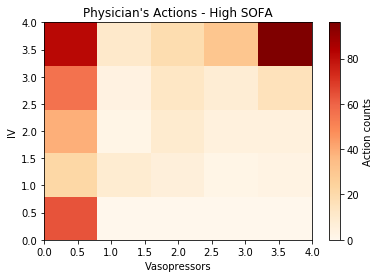

In [467]:
plt.hist2d(high_sofa.vaso_real, high_sofa.iv_real, bins=5, cmap='OrRd')
plt.title("Physician's Actions - High SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

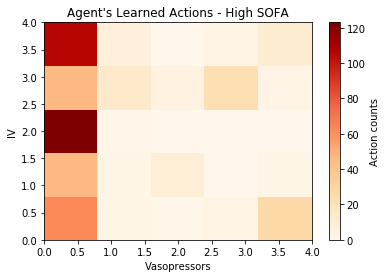

In [468]:
plt.hist2d(high_sofa.vaso_pred, high_sofa.iv_pred, bins=5, cmap='OrRd')
plt.title("Agent's Learned Actions - High SOFA")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

Text(0.5, 0, 'Vasopressors')

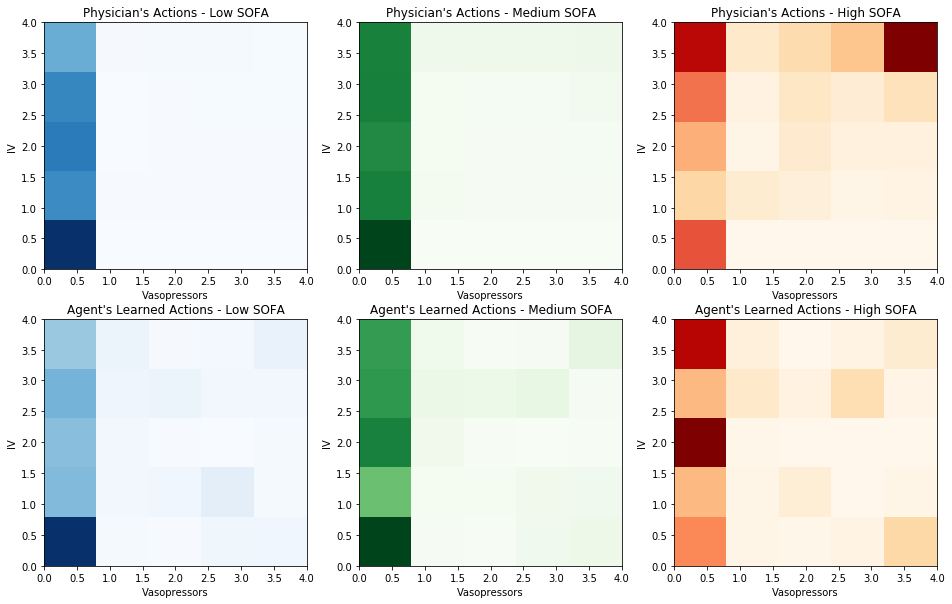

In [469]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16,10))
ax1.hist2d(low_sofa.vaso_real, low_sofa.iv_real, bins=5, cmap='Blues')
ax1.set_title("Physician's Actions - Low SOFA")
ax1.set_ylabel("IV")
ax1.set_xlabel("Vasopressors")
#ax1.colorbar(label = "Action counts")
ax2.hist2d(med_sofa.vaso_real, med_sofa.iv_real, bins=5, cmap='Greens')
ax2.set_title("Physician's Actions - Medium SOFA")
ax2.set_ylabel("IV")
ax2.set_xlabel("Vasopressors")
ax3.hist2d(high_sofa.vaso_real, high_sofa.iv_real, bins=5, cmap='OrRd')
ax3.set_title("Physician's Actions - High SOFA")
ax3.set_ylabel("IV")
ax3.set_xlabel("Vasopressors")
ax4.hist2d(low_sofa.vaso_pred, low_sofa.iv_pred, bins=5, cmap='Blues')
ax4.set_title("Agent's Learned Actions - Low SOFA")
ax4.set_ylabel("IV")
ax4.set_xlabel("Vasopressors")
ax5.hist2d(med_sofa.vaso_pred, med_sofa.iv_pred, bins=5, cmap='Greens')
ax5.set_title("Agent's Learned Actions - Medium SOFA")
ax5.set_ylabel("IV")
ax5.set_xlabel("Vasopressors")
ax6.hist2d(high_sofa.vaso_pred, high_sofa.iv_pred, bins=5, cmap='OrRd')
ax6.set_title("Agent's Learned Actions - High SOFA")
ax6.set_ylabel("IV")
ax6.set_xlabel("Vasopressors")

Text(0.5, 1.0, "Agent's Learned IV Actions")

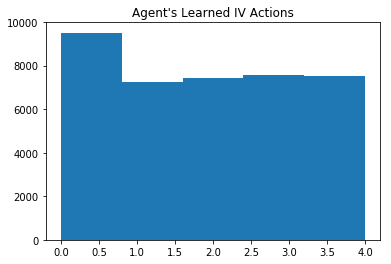

In [470]:
plt.hist(data.iv_real, bins=5)
plt.title("Agent's Learned IV Actions")

Text(0.5, 1.0, 'Vasopressors Agent')

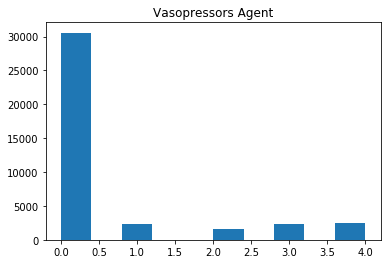

In [471]:
plt.hist(data.vaso_pred, bins=10)
plt.title("Vasopressors Agent")

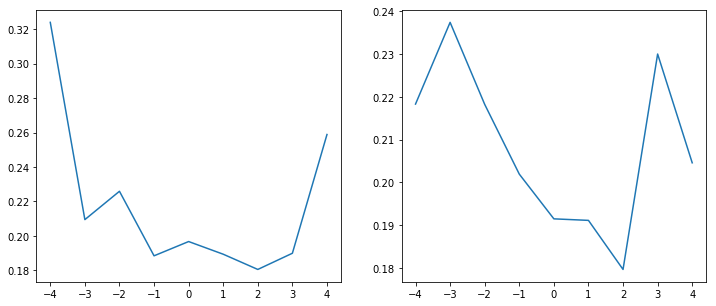

In [472]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(med_sofa_vaso)
ax2.plot(med_sofa_iv)